In [1]:
import nibabel as nib
import numpy as np
import os

subs = ["sub-01", "sub-02", "sub-05", "sub-07"]

base_dir = "/nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni"

for sub in subs:
    mask_path = os.path.join(base_dir, sub, f"{sub}_nsdgeneral_in_MNI.nii.gz")
    
    if not os.path.exists(mask_path):
        print(f"[WARN] File not found: {mask_path}")
        continue

    mask_img = nib.load(mask_path)
    mask = mask_img.get_fdata(dtype=np.float32)

    # 값이 1인 복셀 개수
    num_voxels = np.sum(mask == 1)

    print(f"{sub}: {num_voxels} voxels")


sub-01: 117035 voxels
sub-02: 112578 voxels
sub-05: 122284 voxels
sub-07: 117035 voxels


In [1]:
import os
import nibabel as nib
import numpy as np

subs = ["sub-01", "sub-02", "sub-05", "sub-07"]
base_dir = "/nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni"
masks = []

for sub in subs:
    mask_path = os.path.join(base_dir, sub, f"{sub}_nsdgeneral_in_MNI.nii.gz")
    print("Loading:", mask_path)

    img = nib.load(mask_path)
    mask = img.get_fdata(dtype=np.float32)
    bin_mask = (mask > 0.5).astype(np.uint8)
    masks.append(bin_mask)

masks = np.stack(masks, axis=-1)
group_mask = (np.sum(masks, axis=-1) >= 3).astype(np.uint8)

print("Group mask voxels:", int(group_mask.sum()))

ref_img = nib.load(os.path.join(base_dir, subs[0], f"{subs[0]}_nsdgeneral_in_MNI.nii.gz"))
out_img = nib.Nifti1Image(group_mask, affine=ref_img.affine, header=ref_img.header)
out_path = os.path.join(base_dir, "group_nsdgeneral_in_MNI.nii.gz")
nib.save(out_img, out_path)
print("Saved:", out_path)


Loading: /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni/sub-01/sub-01_nsdgeneral_in_MNI.nii.gz
Loading: /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni/sub-02/sub-02_nsdgeneral_in_MNI.nii.gz
Loading: /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni/sub-05/sub-05_nsdgeneral_in_MNI.nii.gz
Loading: /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni/sub-07/sub-07_nsdgeneral_in_MNI.nii.gz
Group mask voxels: 101319
Saved: /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni/group_nsdgeneral_in_MNI.nii.gz


In [1]:
#.npy 파일 shape 확인

import numpy as np

file_path = '/research/wsi/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni/sub-02/sub-02_ses-01_beta_masked.npy'
data = np.load(file_path)
print(f"배열의 shape: {data.shape}")
print(data)


배열의 shape: (101319, 750)
[[  -88.27266   -235.29953   -144.07748  ...   109.29901    318.14774
    276.1264  ]
 [  255.69789    149.69803    601.1741   ...   354.01227    565.57434
    721.3465  ]
 [ 1186.9498    1012.58826   1131.8556   ... -1061.8302    1292.5708
   -505.43182 ]
 ...
 [ -863.7809      33.253506  -146.296    ...   544.66095    622.7244
    769.5745  ]
 [-2384.2932     594.9237      77.79341  ...   653.0877    2962.9065
   1569.2561  ]
 [-3789.1519    1526.2278     -42.284092 ...   622.6341    3828.1047
   2038.0052  ]]


Voxel index: 12345
Shape: (27000,)
Min: -4.097117
Max: 4.3609576
Mean: 8.6452343e-07
Std: 1.0000014
Median: -0.011517562


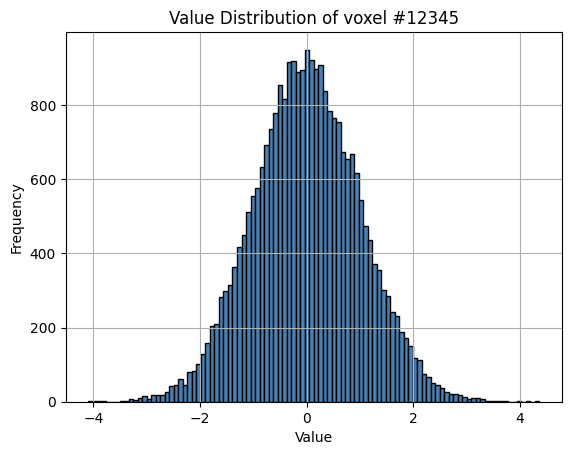

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# z-score된 train 데이터 로드 (shape: 27000 x 101319)
beta_train_z = np.load('/nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni/sub-02/sub-02_beta_train_z.npy')

# ----------------------------
# 1) 볼 voxel index 설정
# ----------------------------
voxel_idx = 12345   # 원하는 column 번호 지정

# 해당 voxel의 27000개 값 추출
voxel_values = beta_train_z[:, voxel_idx]  # shape: (27000,)
# ----------------------------

print("Voxel index:", voxel_idx)
print("Shape:", voxel_values.shape)
print("Min:", np.min(voxel_values))
print("Max:", np.max(voxel_values))
print("Mean:", np.mean(voxel_values))
print("Std:", np.std(voxel_values))
print("Median:", np.median(voxel_values))

plt.hist(voxel_values, bins=100, color='steelblue', edgecolor='black')
plt.title(f"Value Distribution of voxel #{voxel_idx}")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [1]:
import numpy as np

npz_path = "/nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni/sub-05/sub-05_test_nsdgeneral.npz"
data = np.load(npz_path, allow_pickle=True)

print("Keys in NPZ:", data.files)

for key in data.files:
    print("\n==== Key:", key, "====")
    arr = data[key]

    if arr.ndim == 1:
        # filename 리스트 같은 경우
        print(arr[:10])   # 앞 10개만 출력
    else:
        # beta matrix 같은 경우
        print(arr[:2, :5])  # 앞 2행 5열만 출력


Keys in NPZ: ['beta', 'stimuli']

==== Key: beta ====
[[ 1.7941313   2.693886    0.48135534 -0.71442086 -0.80190617]
 [-0.6120736  -0.43488783 -0.8121292  -0.38580075 -0.09764101]]

==== Key: stimuli ====
['coco2017_46003.jpg' 'coco2017_48618.jpg' 'coco2017_44981.jpg'
 'coco2017_32626.jpg' 'coco2017_53053.jpg' 'coco2017_4931.jpg'
 'coco2017_32626.jpg' 'coco2017_6432.jpg' 'coco2017_70336.jpg'
 'coco2017_36577.jpg']


In [7]:
import nibabel as nib
import numpy as np
import os

base_dir = "/nas/research/03-Neural_decoding/3-bids/2-derivatives"

schaefer_path = os.path.join(base_dir,"Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz")
group_mask_path = os.path.join(base_dir,"1-beta/beta_mni/group_nsdgeneral_in_MNI.nii.gz")


schaefer_img = nib.load(schaefer_path)
schaefer_data = schaefer_img.get_fdata()  # (182, 218, 182)
mask_img = nib.load(group_mask_path)
mask_data = mask_img.get_fdata()          # (182, 218, 182)

print("Schaefer shape:", schaefer_data.shape)
print("Mask shape    :", mask_data.shape)

mask_bool = (mask_data > 0.5)
n_vox_in_mask = int(mask_bool.sum())
print(f"Mask == 1 인 voxel 개수: {n_vox_in_mask}")

if schaefer_data.shape != mask_data.shape:
    raise ValueError("Schaefer와 group mask의 shape이 다릅니다!")

schaefer_flat = schaefer_data[mask_bool]
print("마스크 적용 후 Schaefer label 배열 shape:", schaefer_flat.shape)

labels, counts = np.unique(schaefer_flat, return_counts=True)

nonzero_mask = labels != 0
labels = labels[nonzero_mask]
counts = counts[nonzero_mask]

sort_idx = np.argsort(labels)
labels = labels[sort_idx]
counts = counts[sort_idx]

for lbl, cnt in zip(labels, counts):
    print(f"Label {int(lbl):3d}: {cnt:6d} voxels")

print("\n라벨별 voxel 합:", int(counts.sum()))
print("group mask voxel 수:", n_vox_in_mask)


Schaefer shape: (182, 218, 182)
Mask shape    : (182, 218, 182)
Mask == 1 인 voxel 개수: 101319
마스크 적용 후 Schaefer label 배열 shape: (101319,)
Label   1:   2456 voxels
Label   2:   5498 voxels
Label   3:   3674 voxels
Label   4:    942 voxels
Label   5:   2360 voxels
Label   7:   3270 voxels
Label   8:   3999 voxels
Label   9:   3722 voxels
Label  10:    711 voxels
Label  11:   4365 voxels
Label  12:     29 voxels
Label  13:   1873 voxels
Label  14:   3820 voxels
Label  31:   4277 voxels
Label  32:   1871 voxels
Label  33:   2146 voxels
Label  36:      7 voxels
Label  37:     41 voxels
Label  38:     35 voxels
Label  58:      7 voxels
Label  62:    284 voxels
Label  78:      1 voxels
Label  79:    827 voxels
Label  80:   1832 voxels
Label  82:    129 voxels
Label 100:   1159 voxels
Label 101:   1391 voxels
Label 102:   1381 voxels
Label 103:   7531 voxels
Label 104:   1418 voxels
Label 105:   1842 voxels
Label 106:   5908 voxels
Label 107:    192 voxels
Label 108:   5110 voxels
Label 109:   